IMPORT LIBRARUES

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


IMPORT DATASET

In [29]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [30]:
download(filepath,"insurance.csv");

In [ ]:
file_name = "insurance.csv"

In [32]:
df = pd.read_csv(file_name)   #reading from csv


,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [51]:
headers = ["age","gender","bmi","no_of_children","smoker","region","charges"]
df.columns = headers;
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.77,1,0,4,1725.55230
1,28,2,33.00,3,0,4,4449.46200
2,33,2,22.70,0,0,1,21984.47061
3,32,2,28.88,0,0,1,3866.85520
4,31,1,25.74,0,NaN,4,3756.62160


In [41]:
df.replace("?",np.nan, inplace= True);


DATA WRANGLING

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   no_of_children  2771 non-null   int64  
 2   charges         2771 non-null   float64
 3   region          2771 non-null   int64  
 4   bmi             2764 non-null   object 
 5   smoker          2771 non-null   int64  
 6   gender          2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [65]:
#handling missing Data

#as smoker is categorical attribute so we replace it with most frequent entry
is_smoker = df["smoker"].value_counts().idxmax();
df["smoker"]=df["smoker"].replace(np.nan,is_smoker);
#filling missing age values with mean
mean_age=df["age"].astype("float").mean(axis=0);
df["age"]=df["age"].replace(np.nan,mean_age);

#updating the data type of both columns
z= ["age","smoker"];
df[z]=df[z].astype("int");

#verify missing elements are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [53]:
#rounding the charges value to 2 decimal places
df[["charges"]]=  np.round(df[["charges"]],2)


EXPLORATROY DATA ANALYSIS(EDA)

(0.0, 66902.85800000001)

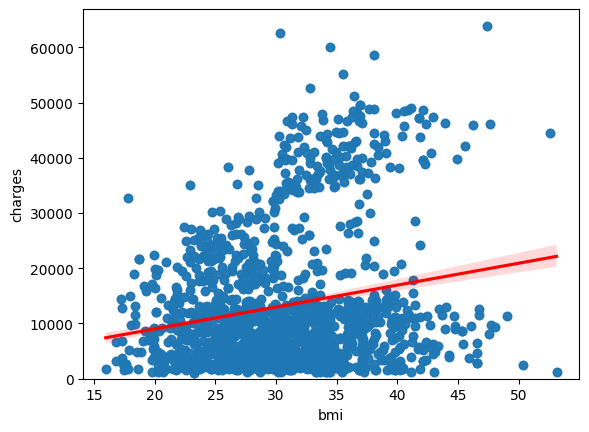

In [57]:
#regression plot for charges with respect to bmi
sns.regplot(x="bmi",y="charges",data = df,line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

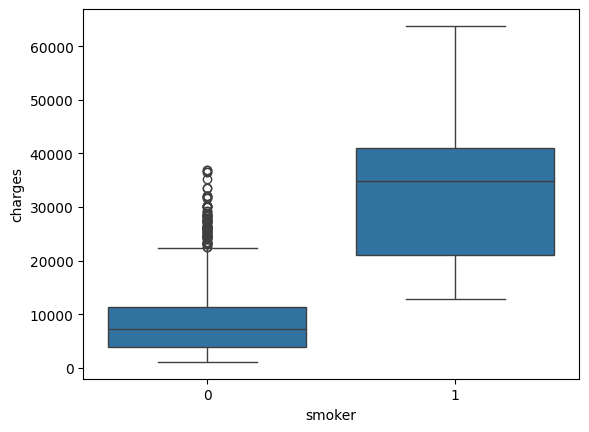

In [59]:
#implemention of box plot for charges with respect to smoker
sns.boxplot(x="smoker",y="charges",data = df)

In [60]:
# correlation matrix of data set
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112864,0.037126,-0.022645,-0.006969,0.298892
gender,-0.026584,1.000000,0.042771,0.015693,0.083056,0.022360,0.062959
bmi,0.112864,0.042771,1.000000,-0.001638,0.010854,0.271172,0.199899
no_of_children,0.037126,0.015693,-0.001638,1.000000,0.006917,-0.025594,0.066551
smoker,-0.022645,0.083056,0.010854,0.006917,1.000000,0.053621,0.789903
region,-0.006969,0.022360,0.271172,-0.025594,0.053621,1.000000,0.054018
charges,0.298892,0.062959,0.199899,0.066551,0.789903,0.054018,1.000000


MODEL DEVELOPMENT

In [66]:
#linear Regression model to used predict the charges on bases of smoker
x= df[["smoker"]];
y = df["charges"];
lr = LinearRegression();
lr.fit(x,y)
lr.score(x,y)

0.6227430402464125

In [68]:
#now using all other attributes
z=df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]];
lr.fit(z,y);
lr.score(z,y)

0.750587353164716

In [73]:
#training pipeline that uses StandardScaler(),
#PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using 
#all the other attributes of the dataset. There will be even further improvement in the performance.
input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(include_bias=True)),("model",LinearRegression())];
pipe = Pipeline(input);
pipe.fit(z,y)
ypipe=pipe.predict(z);
r2_score(y,ypipe)


0.8453719489805444

MODEL REFINMENT

In [83]:
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size=20,random_state=1)

In [84]:
rm = Ridge(alpha=0.1)
rm.fit(x_train,y_train)
yhat=rm.predict(x_test)
r2_score(y_test,yhat)

0.837405066008551

In [85]:
#Applying polynomial transformation to the training parameters with degree=2.
#Using this transformed feature set to fit the same regression model, as above, using the training subset
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
rm.fit(x_train_pr,y_train)
y_hat= rm.predict(x_test_pr)
r2_score(y_test,y_hat)

0.7481189063323497